# Projet de Monte-Carlo : Stratification

In [87]:
#librairies
import numpy as np
import numpy.random as rd
import scipy.stats as sp
import matplotlib.pyplot as plt

In [55]:
def u(d):
    return list(rd.random(d))

def f(u):
    S=0
    for k in range(len(u)):
        S+=u[k]
    S/=len(u)
    S-=0.5
    S*=2*np.pi
    return np.cos(S)

In [56]:
f([1]), f([0.5,0.5]), f([2])


(np.float64(-1.0), np.float64(1.0), np.float64(-1.0))

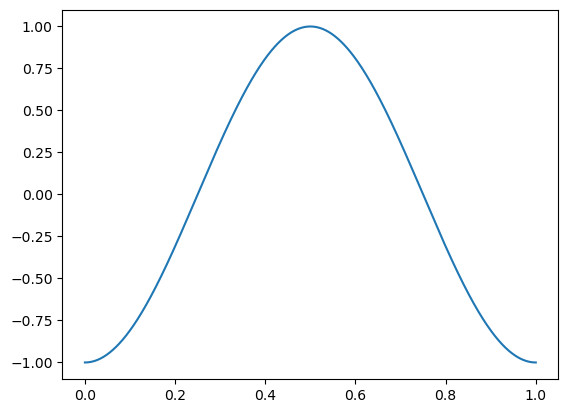

In [103]:
x=np.linspace(0,1,1000)
x=list(x)
f_vals=[]
for k in range(1000):
    f_vals.append(f([x[k]]))

plt.plot(x,f_vals)
plt.show()

### Calcul pour d=1 : 
$\int_{0}^{1}{(cos(2\pi x) - 0.5)dx} = \int_{-0.5}^{0.5}{cos(2\pi x)dx} = [\frac{sin(2\pi x)}{2\pi}]_{-0.5}^{0.5} = 0$

### Question 1 : Simulation MC et Q-MC.

Simulation Monte Carlo :

In [66]:
#simulation en MC
def simulation_mc(d,N):
    S=0
    for k in range(N):
        S+=f(u(d))
    S/=N
    return S

In [67]:
simulation_mc(1,10000), simulation_mc(10000,1), simulation_mc(500,500), simulation_mc(500,100000)

(np.float64(0.00391878240230324),
 np.float64(0.9999728154830887),
 np.float64(0.9965081112623538),
 np.float64(0.9967130580206031))

### Théoriquement, pour d=1, l'intégrale vaut 0. Or, seul le cas d=1 nous permet de retrouver cela.

Simulation Quasi-Monte-Carlo :

In [84]:
def simulation_qmc(d,N):
    sampler=sp.qmc.Sobol(d)
    samples=sampler.random(N)
    S=0
    for k in range(N):
        S+=f(samples[k])
    S/=N
    return S

Je favorise Sobol à Halton par exemple.

In [85]:
simulation_qmc(1,1000), simulation_qmc(100,10000), simulation_qmc(5,1000)

/opt/conda/lib/python3.12/site-packages/scipy/stats/_qmc.py:993: UserWarning: The balance properties of Sobol' points require n to be a power of 2.
  sample = self._random(n, workers=workers)


(np.float64(0.0009783724627037476),
 np.float64(0.9836830509024441),
 np.float64(0.717088761903724))

### Conclusion : Toujours le même problème d'intégrale estimée à 1 alors qu'elle vaut 0.